In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = 'C:/Program Files/ffmpeg/bin/ffmpeg.exe'
import time
from celluloid import Camera
from IPython.display import HTML

<IPython.core.display.Javascript object>


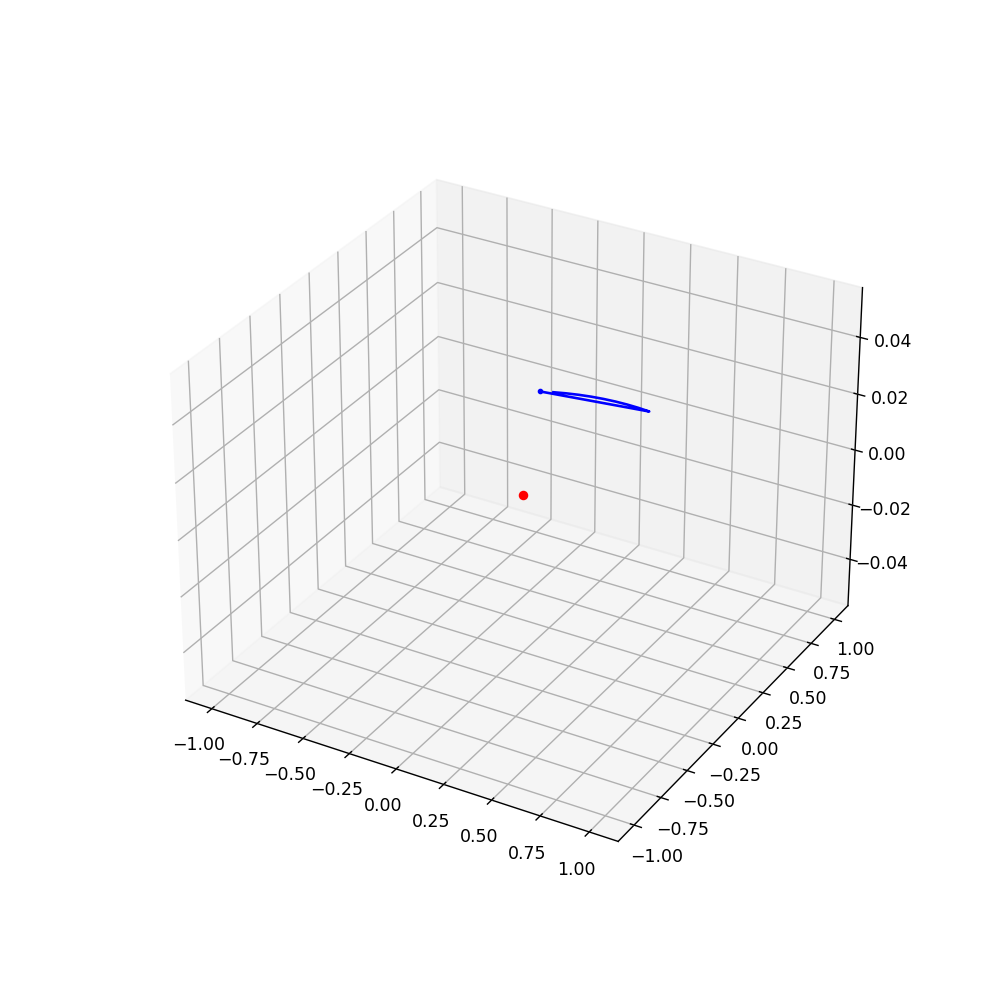

In [2]:
numberTimeSteps = 100
storedTimeSteps = 10

names = ["Sun", "BigSun"]
numObjs = len(names)
m = [1, 2]

q = np.empty((storedTimeSteps,numObjs,3))
q[:] = np.nan
# print(q)
v = np.empty((storedTimeSteps,numObjs,3))
v[:] = np.nan
index = 0
q[index] = [[0,0,0],[1,0,0]]
v[index] = [[0,0,0],[0,1,0]]

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(projection='3d')
camera = Camera(fig)

for i in range(numberTimeSteps):
    
    oldQ = q[index]
    oldV = v[index]
    index = ((index + 1) % storedTimeSteps)
    # TODO
    newQ = [[0,0,0],[np.cos(i*0.0628),np.sin(i*0.0628),0]]
    newV = oldV
    # TODO
    q[index] = newQ
    v[index] = newV
    
    ax = fig.gca()
    ax.scatter(newQ[0][0], newQ[0][1], newQ[0][2], color = 'red', marker = 'o')
    ax.scatter(newQ[1][0], newQ[1][1], newQ[1][2], color = 'blue', marker = '.')
    
#     print(q[i:storedTimeSteps])
#     print(q[0:i])
    reorderQ = np.append(q[index:storedTimeSteps], q[0:index], axis=0)
#     print(q)
#     print('New1')
#     print(reorderQ)
#     print('New2')
#     print(q[:][0][0])
#     print('New3')
#     print(reorderQ[:][0][0])
#     print(reorderQ[:])
#     print(reorderQ[:,0,0])
#     print(reorderQ[:,0,1])
#     print(reorderQ[:,0,2])
    ax.plot(reorderQ[:,0,0], reorderQ[:,0,1], reorderQ[:,0,2], color = 'red', marker = '', linestyle='-')
    ax.plot(reorderQ[:,1,0], reorderQ[:,1,1], reorderQ[:,1,2], color = 'blue', marker = '', linestyle='-')
#     ax.plot(q[:,0,0], q[:,0,1], q[:,0,2], color = 'red', marker = '', linestyle='-')
#     ax.plot(q[:,1,0], q[:,1,1], q[:,1,2], color = 'blue', marker = '', linestyle='-')
    
    camera.snap()
#     assert(False)
    
animation = camera.animate()
# HTML(animation.to_html5_video())